In [1]:
import pandas as pd
import numpy as np


In [9]:
submissions=pd.read_csv("train_submissions.csv")
problems=pd.read_csv("problem_data.csv")
dataset_rc=pd.merge(left=submissions,right=problems, left_on='problem_id', right_on='problem_id')

In [11]:
#Problems=['prob_3649',
#'prob_1868']
#'prob_114',
#'prob_2494']

Users=['user_1']
#'user_521',
#'user_23',
#'user_1633',
#'user_3056',
#'user_1627',
#'user_213',
#'user_2157',
#'user_3335',
#'user_923',
#'user_2528'


In [14]:
new=dataset_rc.loc[dataset_rc['user_id'].isin(Users)][['problem_id','level_type','tags']].head()
new

,problem_id,level_type,tags
2864,prob_2872,A,implementation
3260,prob_522,A,"implementation,math,number theory"
6353,prob_164,A,"brute force,constructive algorithms,math"
8677,prob_4278,A,"implementation,math"
11878,prob_718,D,"dfs and similar,dp,dsu"


In [7]:
#user_data
attempts = pd.DataFrame(submissions.groupby('problem_id')['attempts_range'].mean())
attempts['number_of_attempts_range'] = submissions.groupby('problem_id')['attempts_range'].count()
attempts

,attempts_range,number_of_attempts_range
problem_id,,
prob_1,1.500000,2
prob_10,6.000000,1
prob_100,1.000000,1
prob_1000,1.207317,246
prob_1001,1.100000,10
...,...,...
prob_995,1.000000,4
prob_996,2.000000,3
prob_997,1.360000,50


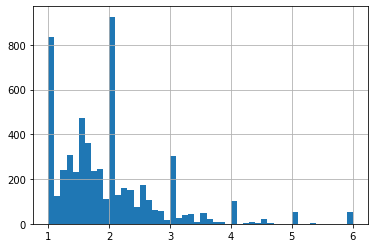

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
attempts['attempts_range'].hist(bins=50)

We can see that most of the users attempt range is between between 1 and 3. Next let’s visualize the number_of_ratings column in as similar manner.

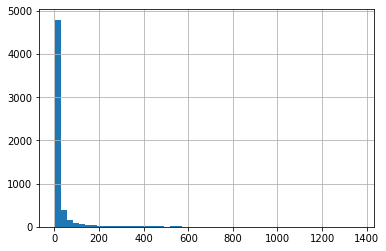

In [11]:
attempts['number_of_attempts_range'].hist(bins=50)

From the above histogram it is clear that most movies have few ratings. Movies with most ratings are those that are most famous.

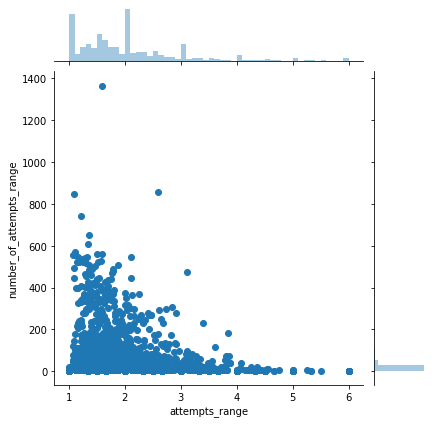

In [12]:
import seaborn as sns
sns.jointplot(x='attempts_range', y='number_of_attempts_range', data=attempts)

From the diagram we can see that their is a positive relationship between the average number of attempts and the number of ratings. The graph indicates that the more the ratings a movie gets the higher the average rating it gets. This is important to note especially when choosing the threshold for the number of ratings per movie.

movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()

ratings.sort_values('number_of_ratings', ascending=False).head(10)



In [50]:
Mean = submissions.groupby(by="user_id",as_index=False)['attempts_range'].mean()
print(Mean.head())
Attempts_avg = pd.merge(submissions,Mean,on='user_id')
Attempts_avg['adg_attempts_range']=Attempts_avg['attempts_range_x']-Attempts_avg['attempts_range_y']
Attempts_avg.head()

     user_id  attempts_range
0     user_1        1.316667
1    user_10        1.607843
2   user_100        1.631579
3  user_1000        1.581818
4  user_1001        1.741379


,user_id,problem_id,attempts_range_x,attempts_range_y,adg_attempts_range
0,user_232,prob_6507,1,1.870968,-0.870968
1,user_232,prob_5781,1,1.870968,-0.870968
2,user_232,prob_137,2,1.870968,0.129032
3,user_232,prob_1550,2,1.870968,0.129032
4,user_232,prob_1322,3,1.870968,1.129032


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
final=pd.pivot_table(Attempts_avg,values='adg_attempts_range',index='user_id',columns='problem_id')
final.head()

problem_id,prob_1,prob_10,prob_100,prob_1000,prob_1001,prob_1002,prob_1003,prob_1004,prob_1005,prob_1006,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1000,NaN,NaN,NaN,-0.581818,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
check = pd.pivot_table(Attempts_avg,values='attempts_range_x',index='user_id',columns='problem_id')
check.head()

problem_id,prob_1,prob_10,prob_100,prob_1000,prob_1001,prob_1002,prob_1003,prob_1004,prob_1005,prob_1006,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two methods commonly used for this :
Use the user average over the row.
User the movie average over the column.
I have used both the methods and you can get it in the code below. But for explaining I would use the movie average method.

In [41]:
# Replacing NaN by Movie Average
final_problem = final.fillna(final.mean(axis=0))
print(final_problem.head())
# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)
final_user

problem_id    prob_1   prob_10  prob_100  prob_1000  prob_1001  prob_1002  \
user_id                                                                     
user_1     -0.038572  4.290323 -0.785714  -0.483500  -0.470156  -0.118133   
user_10    -0.038572  4.290323 -0.785714  -0.483500  -0.470156  -0.118133   
user_100   -0.038572  4.290323 -0.785714  -0.483500  -0.470156  -0.118133   
user_1000  -0.038572  4.290323 -0.785714  -0.581818  -0.470156  -0.118133   
user_1001  -0.038572  4.290323 -0.785714  -0.483500  -0.470156  -0.118133   

problem_id  prob_1003  prob_1004  prob_1005  prob_1006  ...  prob_990  \
user_id                                                 ...             
user_1       0.997665  -0.654545  -0.015772  -0.020981  ...  1.052632   
user_10      0.997665  -0.654545  -0.015772  -0.020981  ...  1.052632   
user_100     0.997665  -0.654545  -0.015772  -0.020981  ...  1.052632   
user_1000    0.997665  -0.654545  -0.015772  -0.020981  ...  1.052632   
user_1001    0.997665 

problem_id,prob_1,prob_10,prob_100,prob_1000,prob_1001,prob_1002,prob_1003,prob_1004,prob_1005,prob_1006,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,...,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17
user_10,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,...,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17,-5.224579e-17
user_100,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,...,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16,-1.246566e-16
user_1000,-3.633457e-17,-3.633457e-17,-3.633457e-17,-5.818182e-01,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,...,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17,-3.633457e-17
user_1001,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,...,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17,4.976862e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_995,5.075305e-17,5.075305e-17,5.075305e-17,-3.142857e-01,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,...,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17,5.075305e-17
user_996,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,...,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17,-2.400482e-17
user_997,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [17]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

user_id,user_1,user_10,user_100,user_1000,user_1001,user_1002,user_1003,user_1004,user_1005,user_1006,...,user_990,user_991,user_992,user_993,user_994,user_995,user_996,user_997,user_998,user_999
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,0.000000,0.026105,0.021650,0.024114,0.040169,-0.046185,-0.032129,0.006539,-1.698411e-02,0.0,...,-1.921643e-30,1.199279e-02,0.007482,-0.024517,0.057590,-0.021571,-1.388407e-31,0.005556,-0.011533,0.007704
user_10,0.026105,0.000000,-0.019026,0.033878,0.033541,0.009073,-0.117598,0.035800,-1.647322e-02,0.0,...,1.086087e-30,-1.359546e-31,0.011508,0.020946,0.019165,0.029198,3.251236e-02,-0.006998,0.023672,0.034790
user_100,0.021650,-0.019026,0.000000,-0.008174,-0.047612,0.018718,0.037137,-0.044490,7.762512e-31,0.0,...,-1.671868e-02,-7.314182e-32,-0.002337,0.006195,0.027823,0.001415,1.465497e-31,-0.005433,0.020065,0.026930
user_1000,0.024114,0.033878,-0.008174,0.000000,-0.024324,0.076594,0.101261,0.033874,6.921892e-02,0.0,...,4.894753e-31,1.735344e-02,-0.007782,-0.023474,0.009061,0.025589,2.393218e-32,-0.005778,0.038884,0.053541
user_1001,0.040169,0.033541,-0.047612,-0.024324,0.000000,0.060639,0.029379,0.161546,-2.312576e-02,0.0,...,-4.142917e-31,4.297398e-32,0.017878,0.019618,-0.001774,0.018176,1.789596e-02,0.024709,0.018363,-0.003837


In [18]:
# user similarity on replacing NAN by item(problem) avg
cosine = cosine_similarity(final_problem)
np.fill_diagonal(cosine, 0 )
similarity_with_problem = pd.DataFrame(cosine,index=final_problem.index)
similarity_with_problem.columns=final_problem.index
similarity_with_problem.head()

user_id,user_1,user_10,user_100,user_1000,user_1001,user_1002,user_1003,user_1004,user_1005,user_1006,...,user_990,user_991,user_992,user_993,user_994,user_995,user_996,user_997,user_998,user_999
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,0.000000,0.994428,0.993641,0.995160,0.990923,0.989418,0.996909,0.991153,0.988495,0.997158,...,0.996585,0.993283,0.990996,0.991149,0.992882,0.994206,0.995354,0.991688,0.990522,0.994414
user_10,0.994428,0.000000,0.993966,0.995240,0.989925,0.990286,0.996530,0.990610,0.988991,0.997221,...,0.996633,0.993340,0.991288,0.991372,0.992640,0.994422,0.995528,0.991522,0.990335,0.994454
user_100,0.993641,0.993966,0.000000,0.994030,0.988573,0.989729,0.996016,0.989203,0.988367,0.996414,...,0.995807,0.992573,0.990752,0.990400,0.991704,0.993486,0.994635,0.990757,0.989740,0.993753
user_1000,0.995160,0.995240,0.994030,0.000000,0.991229,0.991167,0.997693,0.991891,0.990139,0.997932,...,0.997360,0.994104,0.991747,0.992239,0.993108,0.995203,0.996128,0.992248,0.991115,0.995166
user_1001,0.990923,0.989925,0.988573,0.991229,0.000000,0.986342,0.993018,0.987467,0.984555,0.993191,...,0.992622,0.989340,0.986759,0.987365,0.988728,0.990358,0.991571,0.987934,0.986312,0.990204


In [19]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [20]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,user_3395,user_910,user_2675,user_2163,user_308,user_1229,user_2262,user_3333,user_1119,user_3049,...,user_981,user_519,user_1349,user_1051,user_1656,user_3505,user_50,user_2429,user_2398,user_2247
user_10,user_145,user_1358,user_3476,user_3017,user_431,user_2564,user_2399,user_1766,user_1725,user_1200,...,user_756,user_132,user_980,user_1142,user_1012,user_204,user_1398,user_3499,user_2557,user_2174
user_100,user_806,user_902,user_2929,user_1135,user_867,user_1260,user_715,user_1612,user_737,user_2152,...,user_3355,user_677,user_3065,user_3024,user_2155,user_261,user_3015,user_1680,user_3014,user_1783
user_1000,user_3029,user_1864,user_2816,user_2931,user_936,user_985,user_41,user_3441,user_1325,user_510,...,user_3535,user_1875,user_3564,user_2817,user_1901,user_1895,user_1141,user_2638,user_1351,user_2323
user_1001,user_324,user_768,user_3073,user_3018,user_3454,user_1940,user_3168,user_3302,user_3555,user_375,...,user_533,user_1279,user_2600,user_2462,user_389,user_1717,user_1516,user_1129,user_528,user_747


In [21]:
sim_user_30_m = find_n_neighbours(similarity_with_problem,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,user_2366,user_422,user_3265,user_101,user_2089,user_216,user_1888,user_613,user_3422,user_2017,...,user_2364,user_2794,user_1472,user_2871,user_2796,user_2151,user_1298,user_1021,user_3306,user_1006
user_10,user_1759,user_2445,user_2461,user_1472,user_457,user_1601,user_2017,user_2244,user_451,user_449,...,user_2470,user_1298,user_2089,user_1888,user_613,user_1006,user_3422,user_2364,user_3479,user_1719
user_100,user_867,user_1372,user_950,user_1260,user_2651,user_41,user_3015,user_1888,user_613,user_3422,...,user_3058,user_2364,user_2796,user_1472,user_216,user_2089,user_99,user_2470,user_2902,user_2151
user_1000,user_2794,user_1888,user_613,user_3422,user_102,user_1508,user_1663,user_449,user_1384,user_451,...,user_2089,user_1021,user_3306,user_1006,user_99,user_2470,user_3032,user_1759,user_1904,user_434
user_1001,user_1247,user_534,user_422,user_2366,user_3265,user_101,user_1981,user_3217,user_1888,user_613,...,user_451,user_1508,user_2364,user_2796,user_1472,user_216,user_1298,user_2089,user_1021,user_3306


In [22]:
def get_user_similar_problems( user1, user2 ):
    common_problems = Attempts_avg[Attempts_avg.user_id == user1].merge(
    Attempts_avg[Attempts_avg.user_id == user2],
    on = "problem_id",
    how = "inner" )
    return common_problems.merge(problems, on = 'problem_id' )

In [23]:
a = get_user_similar_problems('user_232','user_3568')
a
a = a.loc[ : , ['problem_id','level_type','tags']]
a.head()
#a = a.loc[ : , []]
#a.head()

,problem_id,level_type,tags
0,prob_5781,A,"implementation,math"
1,prob_137,B,implementation
2,prob_3745,A,"brute force,constructive algorithms,math"
3,prob_5071,A,implementation
4,prob_95,A,implementation


In [24]:
def User_problem_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_problem.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['user_id'] == user,'attempts_range'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_problem.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [25]:
score = User_problem_score('user_232','prob_95')
print("score (u,i) is",score)

score (u,i) is 1.577425841858227


In [26]:
Attempts_avg = Attempts_avg.astype({"problem_id": str})
problem_user = Attempts_avg.groupby(by = 'user_id')['problem_id'].apply(lambda x:','.join(x))

In [59]:
def User_problem_predictions(user):
    problem_solved_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    d = problem_user[problem_user.index.isin(b)]
    l = ','.join(d.values)
    problems_solved_by_similar_users = l.split(',')
    problems_under_consideration = list(set(problems_solved_by_similar_users)-set(list(map(str, problem_solved_by_user))))
    problems_under_consideration = list((problems_under_consideration))
    #print(problems_under_consideration)
    score = []
    for item in problems_under_consideration:
        c = final_problem.loc[:,item]
        #print(c)
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['user_id'] == user,'attempts_range'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_problem.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'problem_id':problems_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Problem_Name = top_5_recommendation.merge(problems, how='inner', on='problem_id')
    Problem_Names = Problem_Name[['problem_id','tags','level_type']]
    return Problem_Names

In [60]:
user = input("Enter the user id to whom you want to recommend : ")
predicted_problems = User_problem_predictions(user)
print(" ")
print("The Recommendations for User Id :",user)
print("   ")
print(predicted_problems)

Enter the user id to whom you want to recommend : user_1
 
The Recommendations for User Id : user_1
   
  problem_id                                 tags level_type
0   prob_612                                 math          A
1  prob_2499           brute force,implementation          A
2  prob_2111           binary search,flows,graphs          F
3  prob_4817  binary search,sortings,two pointers          B
4  prob_6536        binary search,greedy,sortings          D
